In [ ]:
#| default_exp MNIST

# Core Fuctions
> fastai를 이용해 MNIST로 영상 처리를 학습하는 방법입니다.

In [3]:
from fastai.vision.all import *

path = untar_data(URLs.MNIST_SAMPLE)

In [17]:
path.ls()

(#3) [Path('/Users/leejaewon/.fastai/data/mnist_sample/valid'),Path('/Users/leejaewon/.fastai/data/mnist_sample/labels.csv'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train')]

In [18]:
(path/'train').ls()

(#2) [Path('/Users/leejaewon/.fastai/data/mnist_sample/train/7'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3')]

In [19]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10000.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10011.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10031.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10034.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10042.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10052.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/1007.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10074.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10091.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10093.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10097.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10099.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10116.png'),Path('/Users/leejaewon/.fasta

In [20]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [21]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [22]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [23]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [24]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

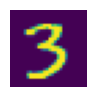

In [25]:
show_image(three_tensors[1])

In [26]:
#형변환
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [27]:
#속성의 길이 = 랭크
len(stacked_threes.shape)

3

In [28]:
#차원 = 길이가 3인 벡터? 랭크? 축의 크기? 축의 개수?
stacked_threes.ndim

3

<Axes: >

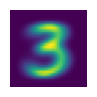

In [29]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

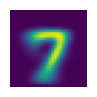

In [30]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

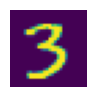

In [41]:
a_3 = stacked_threes[1]
show_image(a_3)

In [31]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

arr

array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [33]:
tns[1]

tensor([4, 5, 6])

In [34]:
tns[:,1]

tensor([2, 5])

In [35]:
tns[1,1:3]

tensor([5, 6])

In [36]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [37]:
tns.type()

'torch.LongTensor'

In [38]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [39]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                                   for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                                   for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [44]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3,mean3)

tensor(0.1114)

In [45]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]),
 torch.Size([1010]))

In [46]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [47]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [48]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1-is_3(valid_7_tens).float().mean())

accuracy_3s, accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

# 확률적 경사 하강법 (SGD)

In [49]:
def pr_three(x,w): return (x*w).sum()

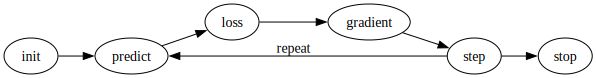

In [51]:
from fastbook import *

#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [52]:
def f(x): return x**2

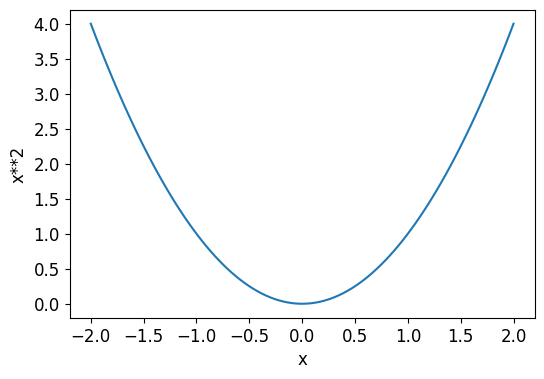

In [53]:
plot_function(f, 'x', 'x**2')

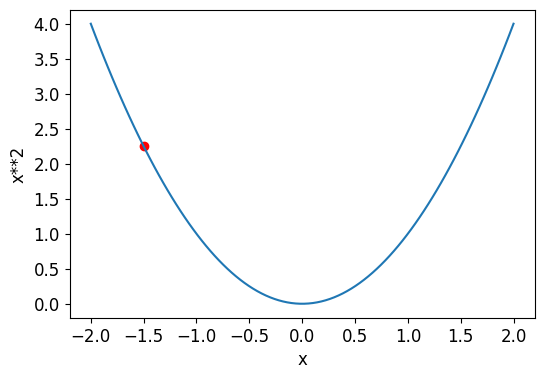

In [54]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

In [ ]:
#특정 값의 변수에 대한 그레이디언트를 계산할 때 아래 과정으로 계산
#예시 1
xt = tensor(3.).requires_grad_()
yt = f(xt)
yt

In [ ]:
#역전파
yt.backward()
xt.grad

In [ ]:
#예시2
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [60]:
def f(x): return (x**2).sum()
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [61]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

#학습률
w -= w.grad * lr

In [ ]:
##SGD를 활용한 시작부터 끝까지 보여주는 예제


In [10]:
#| export